# Clase 2: Guía de preprocesamiento [Parte 2]

Base de datos masivas (11088) - Curso 2024

Esta guia contiene ejemplos con Python y librerias como Pandas, Numpy, etc. para realizar tareas de la etapa de preprocesamiento y transformación de datos.
En esta segunda parte nos vamos a enfocar en:

  1. Manejo de datos faltantes: Imputación puntual (o simple) y modelos implícitos.
  2. Reducción de dimensionalidad.

In [ ]:
# Librerias
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import zscore

from sklearn.impute import KNNImputer


## Datos Faltantes

In [242]:
# Datos Iris
iris = pd.read_csv('https://raw.githubusercontent.com/bdm-unlu/2024/main/TPs/TP01/iris_faltantes.csv')

iris

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,NaN
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,NaN,1.5,0.2,setosa
4,NaN,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,NaN,NaN,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,NaN,3.0,5.2,2.0,NaN
148,6.2,3.4,5.4,2.3,NaN


In [ ]:
iris.describe( include= "all")

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
count,135.000000,135.000000,135.000000,135.000000,135
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,versicolor
freq,NaN,NaN,NaN,NaN,47
mean,5.829630,3.040741,3.717778,1.212593,NaN
std,0.843153,0.428865,1.757027,0.774060,NaN
min,4.300000,2.200000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.500000,0.300000,NaN
50%,5.800000,3.000000,4.300000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


## Imputación simple

Para la imputación puntual podemos usar una medida de tendencia central como la media, mediana o la moda.

In [206]:
variables_num = ['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']
variables_cat = ['Species']

In [237]:
medias = iris[variables_num].mean()
medias

,0
Sepal.Length,5.829630
Sepal.Width,3.040741
Petal.Length,3.717778
Petal.Width,1.212593


In [208]:
medias.values[0]

5.82962962962963

In [243]:
iris_med = iris.copy()
for i, col in enumerate(variables_num):
  iris_med[col] = iris_med[col].fillna(medias.values[i])

iris_med.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.829630,3.040741,3.717778,1.212593
std,0.799587,0.406705,1.666241,0.734064
min,4.300000,2.200000,1.000000,0.100000
25%,5.125000,2.800000,1.600000,0.400000
50%,5.829630,3.000000,4.000000,1.300000
75%,6.300000,3.200000,5.000000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [244]:
iris

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,NaN
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,NaN,1.5,0.2,setosa
4,NaN,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,NaN,NaN,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,NaN,3.0,5.2,2.0,NaN
148,6.2,3.4,5.4,2.3,NaN


In [ ]:
moda = iris[variables_cat].mode()
moda

,Species
0,versicolor



Imputamos con la moda la columna _Species_

<img src="https://i.pinimg.com/736x/b3/8a/a5/b38aa506b099dd955dad165132a5ff3c.jpg" width="300">

In [ ]:
for i, col in enumerate(variables_cat):
   iris_med[col] = iris_med[col].fillna(moda.values[i][0])
iris_med.describe(include="all")

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
count,135.000000,135.000000,135.000000,135.000000,135
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,versicolor
freq,NaN,NaN,NaN,NaN,47
mean,5.829630,3.040741,3.717778,1.212593,NaN
std,0.843153,0.428865,1.757027,0.774060,NaN
min,4.300000,2.200000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.500000,0.300000,NaN
50%,5.800000,3.000000,4.300000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


**QUIZ 1**:  Verificar con el dataset original cómo resultaron esas imputaciones. ¿Cómo harian esa verificación con lo visto hasta ahora en el curso?
El dataset está disponible [aquí](https://raw.githubusercontent.com/bdm-unlu/2021/main/dockers/r/data/iris.csv). 👁 el separador es el pipe (|)



## Imputaciones con modelos implícitos



*   Cold Deck 🧊
*   Hot Deck 🔥



In [ ]:
# Hot Deck: Es por vecinos mas cercanos
HotDeck = KNNImputer(n_neighbors=3, weights="uniform")

In [ ]:
iris_hd = HotDeck.fit_transform(iris[variables_num])
iris_hd = pd.DataFrame(iris_hd, columns=variables_num)
iris_hd

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.100000,3.500000,1.4,0.2
1,4.900000,3.000000,1.4,0.2
2,4.700000,3.200000,1.3,0.2
3,4.600000,3.386061,1.5,0.2
4,5.500000,3.600000,1.4,0.2
...,...,...,...,...
145,6.312132,3.136940,5.2,2.3
146,6.300000,2.500000,5.0,1.9
147,7.038272,3.000000,5.2,2.0
148,6.200000,3.400000,5.4,2.3


In [ ]:
from sklearn.preprocessing import LabelEncoder
# Encodeamos las categóricas
cat2num = LabelEncoder().fit([np.nan,'setosa', 'versicolor', 'virginica'])
iris["SpeciesN"]=cat2num.transform(iris.Species)
iris.loc[iris['SpeciesN']==0, 'SpeciesN'] = np.nan
iris

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,SpeciesN
0,5.1,3.5,1.4,0.2,NaN,NaN
1,4.9,3.0,1.4,0.2,setosa,1.0
2,4.7,3.2,1.3,0.2,setosa,1.0
3,4.6,NaN,1.5,0.2,setosa,1.0
4,NaN,3.6,1.4,0.2,setosa,1.0
...,...,...,...,...,...,...
145,NaN,NaN,5.2,2.3,virginica,3.0
146,6.3,2.5,5.0,1.9,virginica,3.0
147,NaN,3.0,5.2,2.0,NaN,NaN
148,6.2,3.4,5.4,2.3,NaN,NaN


In [ ]:
variables_num_2 = ['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']
variables_num_2.append('SpeciesN')
iris_hd = HotDeck.fit_transform(iris[variables_num_2])
iris_hd = pd.DataFrame(iris_hd, columns=variables_num_2)
iris_hd

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,SpeciesN
0,5.100000,3.500000,1.4,0.2,1.000000
1,4.900000,3.000000,1.4,0.2,1.000000
2,4.700000,3.200000,1.3,0.2,1.000000
3,4.600000,3.400000,1.5,0.2,1.000000
4,5.166667,3.600000,1.4,0.2,1.000000
...,...,...,...,...,...
145,6.300000,3.133333,5.2,2.3,3.000000
146,6.300000,2.500000,5.0,1.9,3.000000
147,6.866667,3.000000,5.2,2.0,2.666667
148,6.200000,3.400000,5.4,2.3,3.000000


## Imputación utilizando regresiones


In [159]:
from sklearn.linear_model import LinearRegression

In [245]:
iris

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,NaN
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,NaN,1.5,0.2,setosa
4,NaN,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,NaN,NaN,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,NaN,3.0,5.2,2.0,NaN
148,6.2,3.4,5.4,2.3,NaN


In [266]:
# Varables independientes
ind = ['Petal.Length']

# Variable dependiente (la que vamos a estimar)
dep = ['Sepal.Length']

# Eliminamos todos los NAs
iris_sinNA = iris.dropna()
X = iris_sinNA[ind]
y = iris_sinNA[dep]

# Ajuste del modelo de regresión
reg = LinearRegression().fit(X, y)
print("R²:",reg.score(X, y))
print("Coef:",reg.coef_)

R²: 0.7516901272100955
Coef: [[0.40584852]]


In [277]:
reg.predict(iris[ind].fillna(iris[ind].median()))

array([[4.89692648],
       [4.89692648],
       [4.85634163],
       [4.93751133],
       [6.11447204],
       [5.01868104],
       [4.89692648],
       [4.93751133],
       [4.89692648],
       [4.93751133],
       [4.93751133],
       [6.11447204],
       [6.11447204],
       [6.11447204],
       [4.81575678],
       [4.93751133],
       [4.85634163],
       [4.89692648],
       [5.01868104],
       [4.93751133],
       [5.01868104],
       [4.93751133],
       [4.73458708],
       [5.01868104],
       [5.09985074],
       [4.97809619],
       [4.97809619],
       [4.93751133],
       [4.89692648],
       [4.97809619],
       [4.97809619],
       [4.93751133],
       [6.11447204],
       [4.89692648],
       [4.93751133],
       [4.81575678],
       [4.85634163],
       [4.89692648],
       [4.85634163],
       [4.93751133],
       [4.85634163],
       [4.85634163],
       [4.85634163],
       [6.11447204],
       [5.09985074],
       [4.89692648],
       [4.97809619],
       [4.896

In [278]:
# Hacemos la predicción con el modelo de regresión lineal multiple
iris['Sepal.Length_RegLin'] = reg.predict(iris[ind].fillna(iris[ind].median()))

# Asignamos los valores originales
iris['Sepal.Length_IMP'] = iris['Sepal.Length']


In [279]:
# Rellenamos los NAs con los valores obtenidos en la regresión
iris.loc[np.isnan(iris['Sepal.Length_IMP']),'Sepal.Length_IMP'] = iris.loc[np.isnan(iris['Sepal.Length_IMP']), 'Sepal.Length_RegLin']

In [259]:
iris["Sepal.Length_MED"] = iris_med["Sepal.Length"] # Agregamos la media

In [261]:
iris_ori = pd.read_csv("https://raw.githubusercontent.com/bdm-unlu/2021/main/dockers/r/data/iris.csv", delimiter="|")
iris['Sepal.Length_ORI'] = iris_ori["Sepal.Length"]

In [280]:
iris

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Sepal.Length_RegLin,Sepal.Length_IMP,Sepal.Length_MED,Sepal.Length_ORI
0,5.1,3.5,1.4,0.2,NaN,4.896926,5.100000,5.10000,5.1
1,4.9,3.0,1.4,0.2,setosa,4.896926,4.900000,4.90000,4.9
2,4.7,3.2,1.3,0.2,setosa,4.856342,4.700000,4.70000,4.7
3,4.6,NaN,1.5,0.2,setosa,4.937511,4.600000,4.60000,4.6
4,NaN,NaN,NaN,NaN,NaN,6.114472,6.114472,5.82963,5.0
...,...,...,...,...,...,...,...,...,...
145,NaN,NaN,NaN,NaN,NaN,6.114472,6.114472,5.82963,6.7
146,6.3,2.5,5.0,1.9,virginica,6.357981,6.300000,6.30000,6.3
147,NaN,NaN,NaN,NaN,NaN,6.114472,6.114472,5.82963,6.5
148,6.2,3.4,5.4,2.3,NaN,6.520321,6.200000,6.20000,6.2


In [281]:
iris[["Sepal.Length_ORI", "Sepal.Length_IMP", "Sepal.Length_MED"]].corr()

,Sepal.Length_ORI,Sepal.Length_IMP,Sepal.Length_MED
Sepal.Length_ORI,1.000000,0.965414,0.965607
Sepal.Length_IMP,0.965414,1.000000,0.994300
Sepal.Length_MED,0.965607,0.994300,1.000000


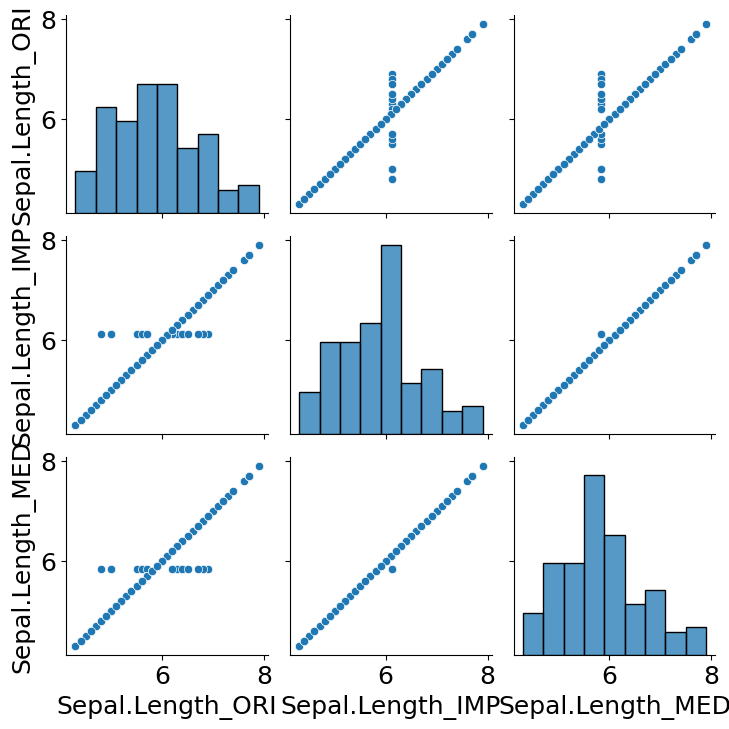

In [282]:
import seaborn as sns
sns.pairplot(data = iris, vars=["Sepal.Length_ORI", "Sepal.Length_IMP", "Sepal.Length_MED"] )
plt.show()

## Reducción de dimensionalidad

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/bdm-unlu/2021/main/dockers/r/data/iris.csv", delimiter="|")

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [ ]:
# Escalamos las variables numéricas
variables_num = ['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']
x = StandardScaler().fit_transform(data[variables_num])

In [ ]:
# Aplicamos la descomposición en CP

n_cp = len(variables_num) # Definimos la cantidad de CP
columns = [f"CP{i+1}" for i in range(n_cp)]

pca = PCA(n_components=n_cp)

principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = columns)
principalDf

,CP1,CP2,CP3,CP4
0,-2.264703,0.480027,-0.127706,-0.024168
1,-2.080961,-0.674134,-0.234609,-0.103007
2,-2.364229,-0.341908,0.044201,-0.028377
3,-2.299384,-0.597395,0.091290,0.065956
4,-2.389842,0.646835,0.015738,0.035923
...,...,...,...,...
145,1.870503,0.386966,0.256274,-0.389257
146,1.564580,-0.896687,-0.026371,-0.220192
147,1.521170,0.269069,0.180178,-0.119171
148,1.372788,1.011254,0.933395,-0.026129


In [ ]:
# Varianza explicada
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

In [ ]:
# Varianza explicada acumulada
pca.explained_variance_ratio_.cumsum()

array([0.72962445, 0.95813207, 0.99482129, 1.        ])

In [ ]:
# Generar la matriz de loadings (correlación entre las componentes y las variables originales)
pd.DataFrame(pca.components_, columns=variables_num)


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,0.521066,-0.269347,0.580413,0.564857
1,0.377418,0.923296,0.024492,0.066942
2,-0.719566,0.244382,0.142126,0.634273
3,-0.261286,0.123510,0.801449,-0.523597


In [ ]:
principalDf["Species"] = data.Species
principalDf

,CP1,CP2,CP3,CP4,Species
0,-2.264703,0.480027,-0.127706,-0.024168,setosa
1,-2.080961,-0.674134,-0.234609,-0.103007,setosa
2,-2.364229,-0.341908,0.044201,-0.028377,setosa
3,-2.299384,-0.597395,0.091290,0.065956,setosa
4,-2.389842,0.646835,0.015738,0.035923,setosa
...,...,...,...,...,...
145,1.870503,0.386966,0.256274,-0.389257,virginica
146,1.564580,-0.896687,-0.026371,-0.220192,virginica
147,1.521170,0.269069,0.180178,-0.119171,virginica
148,1.372788,1.011254,0.933395,-0.026129,virginica


In [ ]:
labels = principalDf["Species"].unique().tolist()
labels

['setosa', 'versicolor', 'virginica']

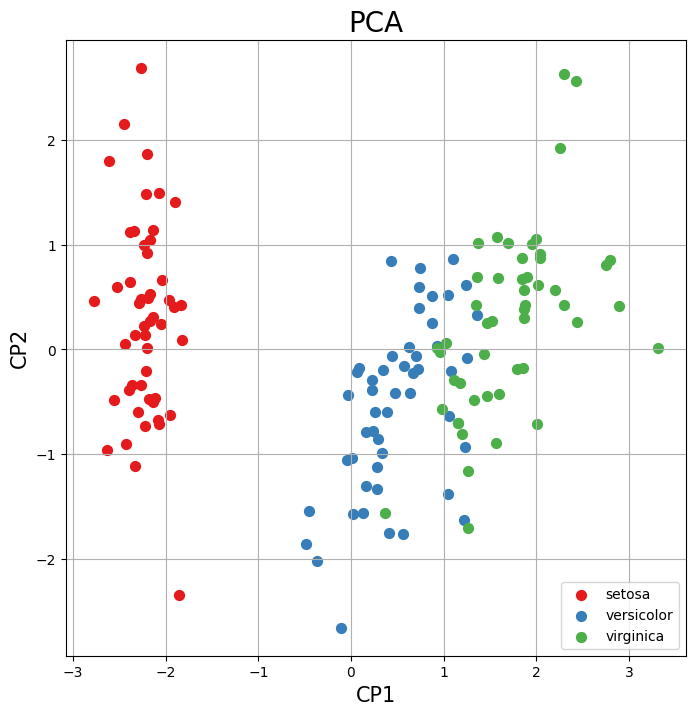

In [152]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
eje1 = "CP1"
eje2 = "CP2"
ax.set_xlabel(eje1, fontsize = 15)
ax.set_ylabel(eje2, fontsize = 15)
ax.set_title('PCA', fontsize = 20)

targets = [i for i in labels]
colors = ['#e41a1c','#377eb8','#4daf4a']
for target, color in zip(targets,colors):
    indicesToKeep = principalDf['Species'] == target
    ax.scatter(principalDf.loc[indicesToKeep, eje1]
               , principalDf.loc[indicesToKeep, eje2]
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

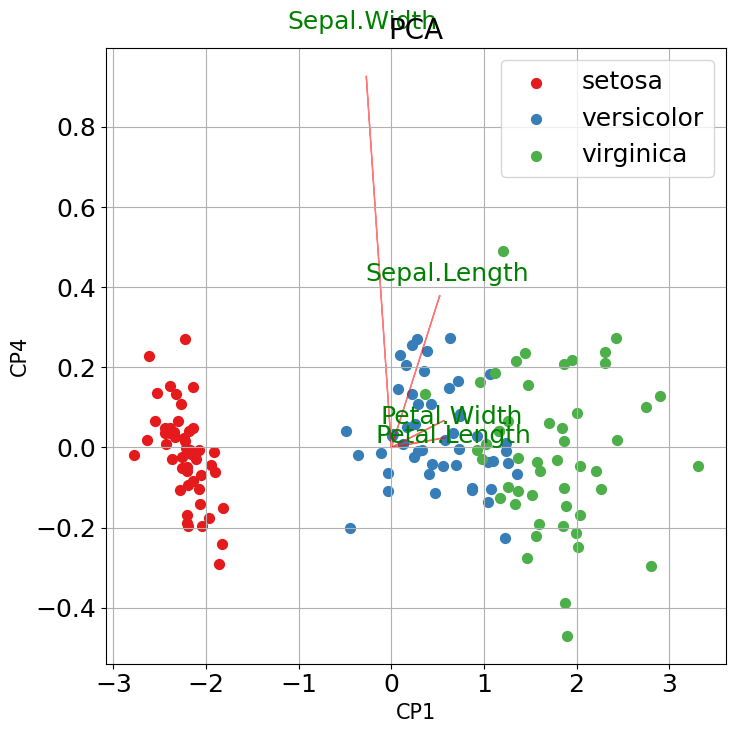

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
eje1 = "CP1"
eje2 = "CP4"
ax.set_xlabel(eje1, fontsize = 15)
ax.set_ylabel(eje2, fontsize = 15)
ax.set_title('PCA', fontsize = 20)

targets = [i for i in labels]
colors = ['#e41a1c','#377eb8','#4daf4a']
for target, color in zip(targets,colors):
    indicesToKeep = principalDf['Species'] == target
    ax.scatter(principalDf.loc[indicesToKeep, eje1]
               , principalDf.loc[indicesToKeep, eje2]
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

coeff = np.transpose(pca.components_[0:2, :])
n = coeff.shape[0]
for i in range(n):
    ax.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
    plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, variables_num[i], color = 'g', ha = 'center', va = 'center')


In [ ]:
def biplot(score,coeff,y,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

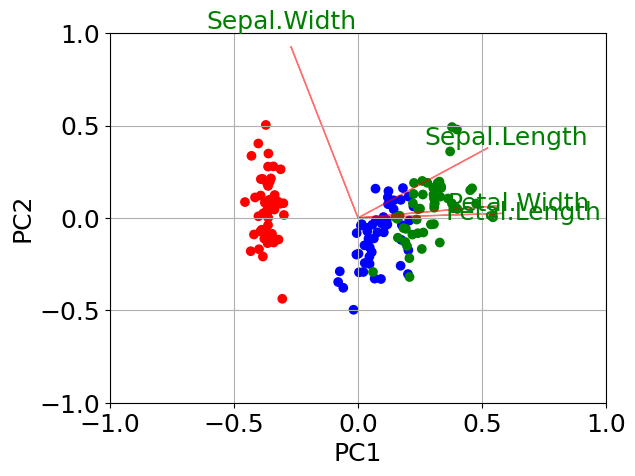

In [ ]:
cols = {"versicolor": "blue", "virginica": "green", "setosa": "red"}
y = list(map(cols.get, principalDf['Species']))
biplot(principalComponents[:,0:2],np.transpose(pca.components_[0:2, :]),y, variables_num)
plt.show()

In [154]:
!pip install pca


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 2.3 MB/s eta 0:00:00


[pca] >Extracting column labels from dataframe.
[pca] >The PCA reduction is performed on the [4] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[4]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 with loadings.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


[scatterd] >INFO> Create scatterplot


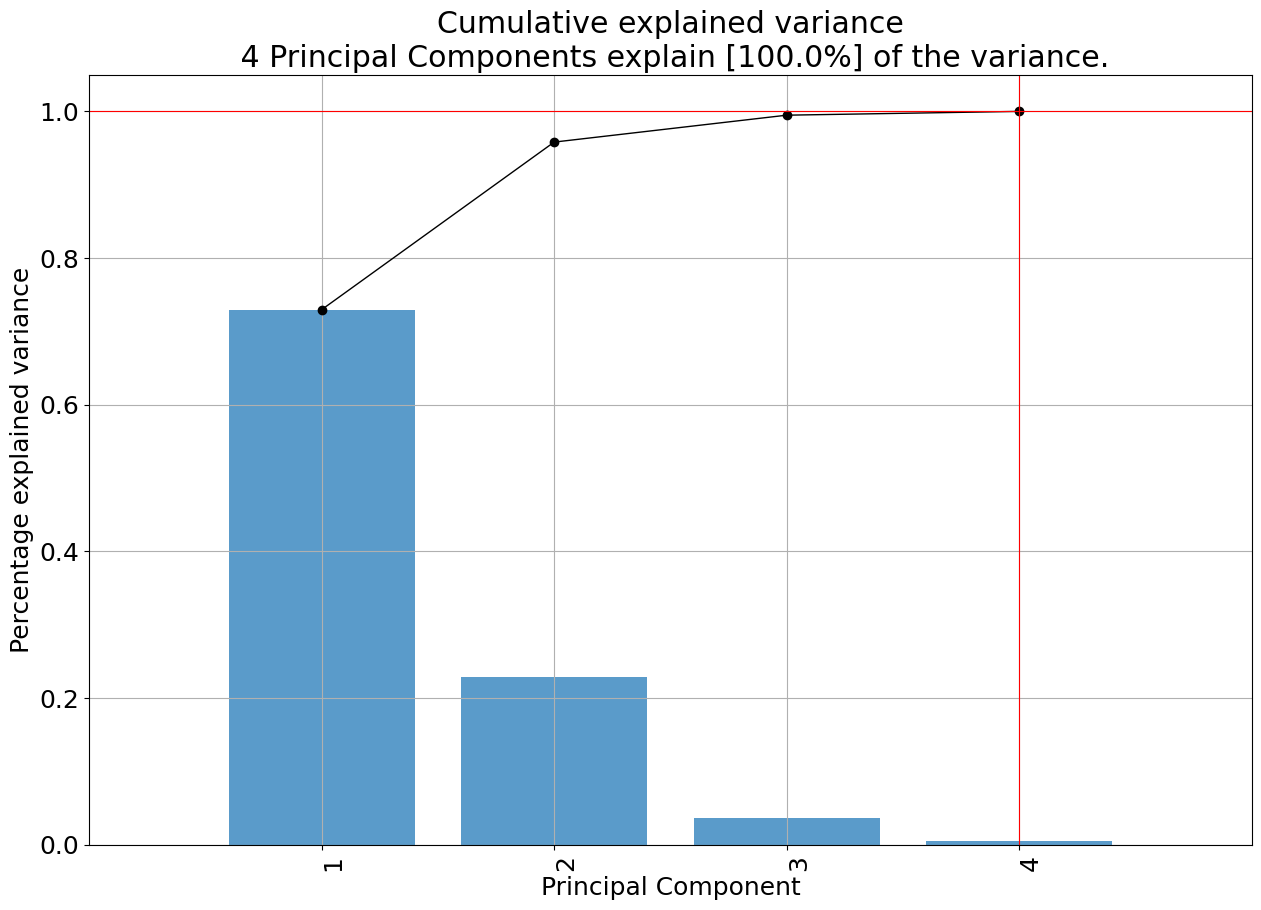

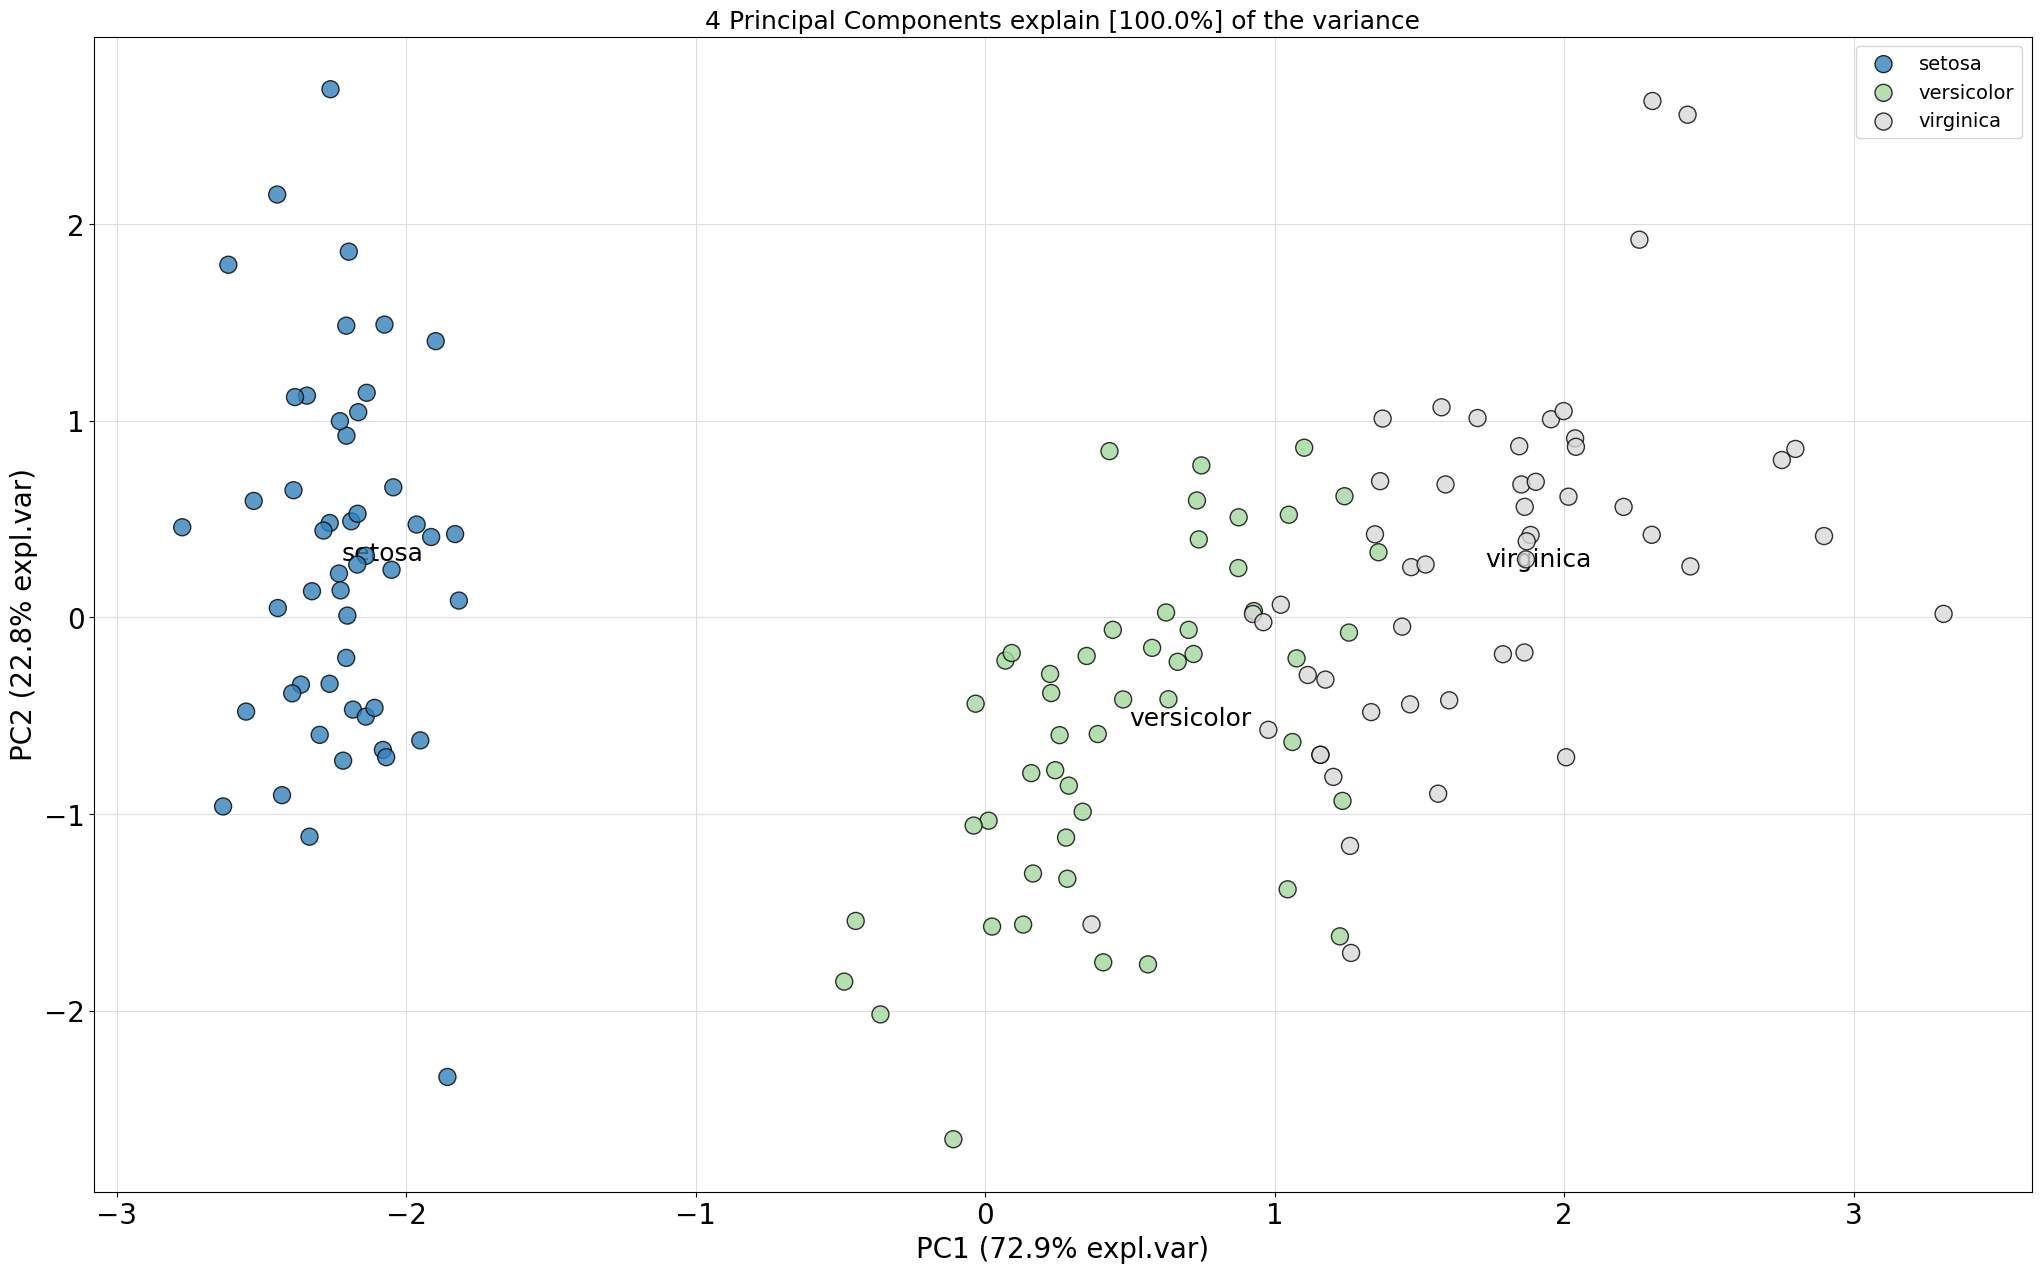

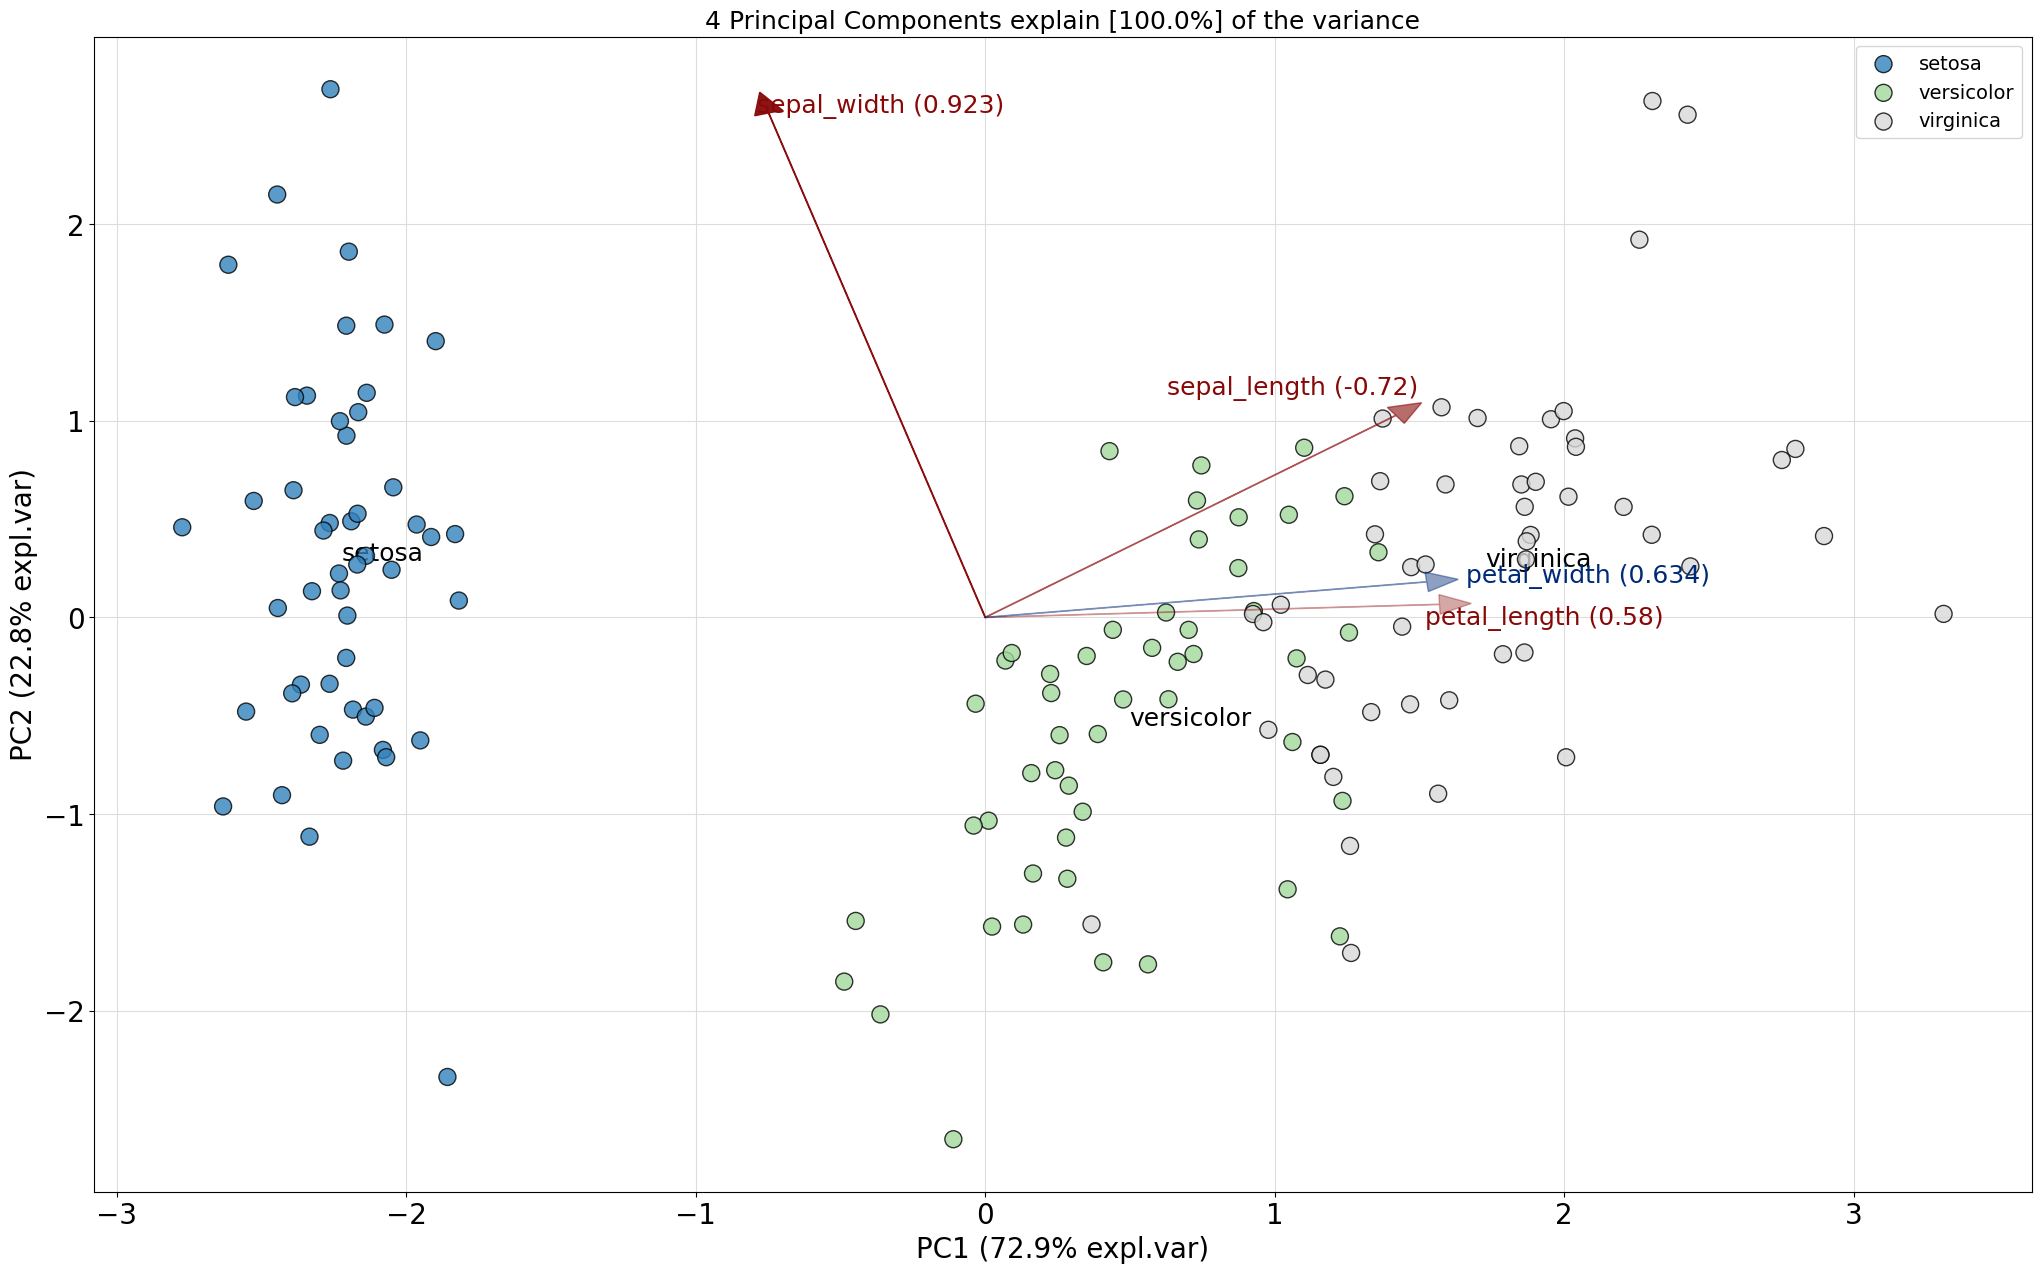

In [158]:
#!pip install pca
from pca import pca as pca2

from sklearn.datasets import load_iris
iris = load_iris()
X = pd.DataFrame(data=StandardScaler().fit_transform(iris.data),
                 columns=iris.feature_names)
X.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
y = pd.Categorical.from_codes(iris.target,
                              iris.target_names)

model = pca2(n_components=1.0)

# model = pca2(n_components=4)

results = model.fit_transform(X=X, row_labels=y)

fig, ax = model.plot()
fig, ax = model.scatter()

#biplot
fig, ax = model.biplot(n_feat=4)